In [120]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn as sk
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, r2_score


In [121]:
dados_vendas = {
    'mes': ['Janeiro', 'Fevereiro', 'Março', 'Abril', 'Maio', 'Junho', 'Julho', 'Agosto', 'Setembro', 'Outubro', 'Novembro', 'Dezembro'],
    'vendas': [2000, 2200, 2300, 2500, 2600, 2700, 2800, 2900, 3000, 3100, 3200, 3300]
}
df = pd.DataFrame(dados_vendas)
df

,mes,vendas
0,Janeiro,2000
1,Fevereiro,2200
2,Março,2300
3,Abril,2500
4,Maio,2600
5,Junho,2700
6,Julho,2800
7,Agosto,2900
8,Setembro,3000
9,Outubro,3100


In [122]:
import locale
locale.setlocale(locale.LC_TIME, 'pt_BR.UTF-8')

# Transformar os meses em inteiros
df['mes'] = df['mes'].apply(lambda x: pd.to_datetime(x, format='%B').month)
df

,mes,vendas
0,1,2000
1,2,2200
2,3,2300
3,4,2500
4,5,2600
5,6,2700
6,7,2800
7,8,2900
8,9,3000
9,10,3100


In [123]:
# Atribuindo X para todos os meses menos dezembro
X = df.iloc[:-1, 0].values.reshape(-1, 1)
y = df.iloc[:-1,1].values.reshape(-1, 1)


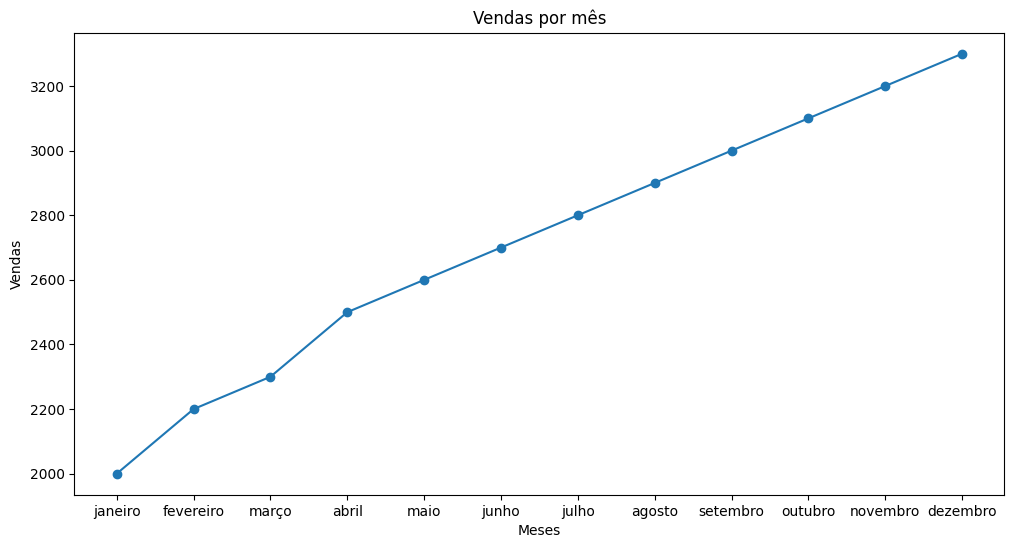

In [124]:
# Visualizando os dados
plt.figure(figsize=(12, 6))
plt.title('Vendas por mês')
plt.xlabel('Meses')
plt.ylabel('Vendas')
plt.xticks(df['mes'], df['mes'].apply(lambda x: pd.to_datetime(str(x), format='%m').strftime('%B')))
plt.plot(df['mes'], df['vendas'], marker='o', linestyle='-')
plt.show()

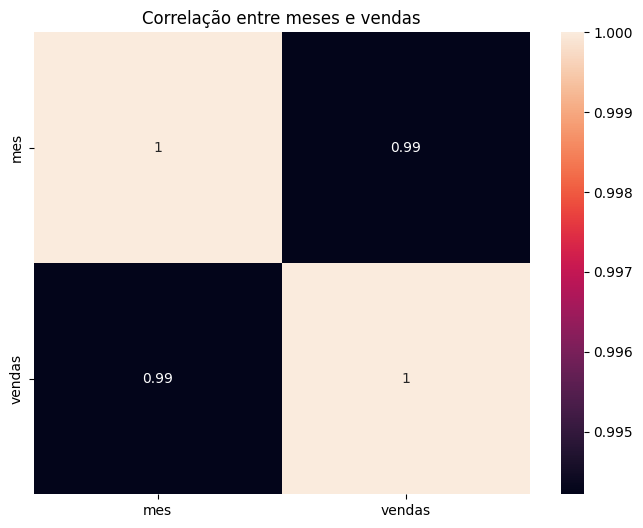

In [125]:
# Há relação entre os meses e as vendas?
# Qual a sua correlação?
correlacao = df.corr()
correlacao
# Visualizando a correlação
plt.figure(figsize=(8, 6))
sns.heatmap(correlacao, annot=True)
plt.title('Correlação entre meses e vendas')
plt.show()

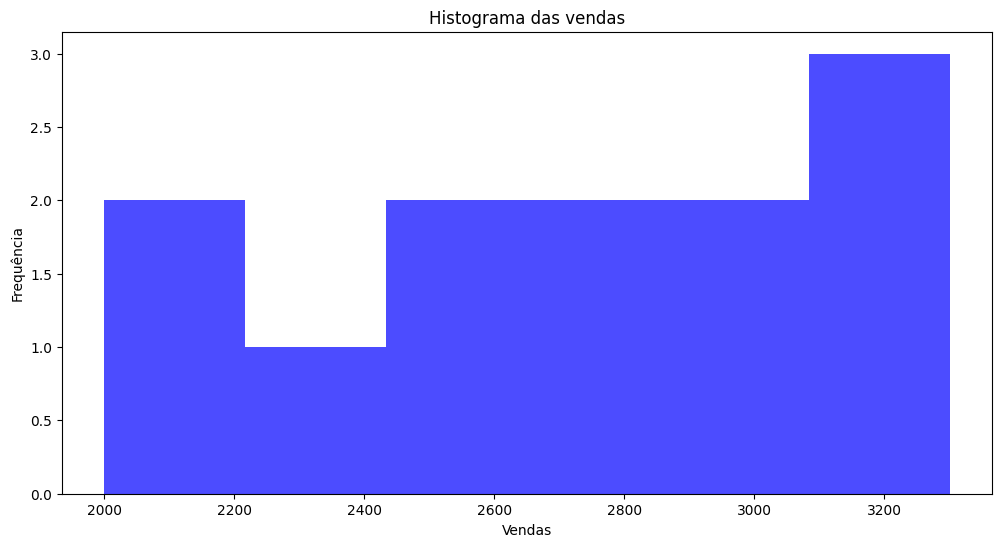

In [126]:
# Histograma dos dados
plt.figure(figsize=(12, 6))
plt.title('Histograma das vendas')
plt.xlabel('Vendas')
plt.ylabel('Frequência')
plt.hist(df['vendas'], bins=6, color='blue', alpha=0.7)
plt.show()

In [135]:
# Dividindo os dados em treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [136]:
len(X_train), len(X_test), len(y_train), len(y_test)

(8, 3, 8, 3)

In [129]:
modelo = LinearRegression()
modelo.fit(X_train, y_train)

LinearRegression()

In [130]:
y_pred = modelo.predict(X_test)
y_pred

array([[2673.68421053],
       [2121.05263158],
       [3115.78947368]])

In [131]:
# Valor previsto para  dezembro
y_pred_dezembro = modelo.predict([[12]])
y_pred_dezembro

array([[3336.84210526]])

In [132]:
# Avaliando o modelo
mae = mean_absolute_error(y_test, y_pred)
mae

54.38596491228069

In [133]:
r2_score(y_test, y_pred)

0.9748458582789741

In [134]:
mean_squared_error = sk.metrics.mean_squared_error(y_test, y_pred)
mean_squared_error

5198.522622345347

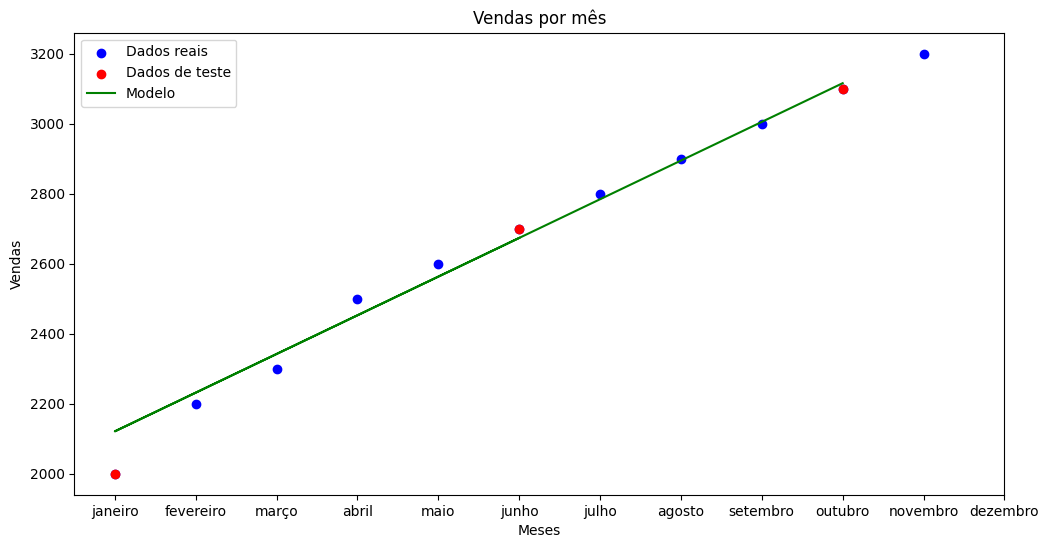

In [137]:
# Visualizando os dados com scatter plot
plt.figure(figsize=(12, 6))
plt.title('Vendas por mês')
plt.xlabel('Meses')
plt.ylabel('Vendas')
plt.scatter(X, y, color='blue', label='Dados reais')
plt.scatter(X_test, y_test, color='red', label='Dados de teste')
plt.plot(X_test, y_pred, color='green', label='Modelo')
plt.legend()
plt.xticks(df['mes'], df['mes'].apply(lambda x: pd.to_datetime(str(x), format='%m').strftime('%B')))
plt.show()